AML 3104 - Neural Networks and Deep Learning

Presented by Javier Melo C0871987

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import pickle

In [ ]:
df = pd.read_csv("Algerian_forest_fires_cleaned.csv")
print(df.head(10))
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0, 1)

1. Data preparation 

In [25]:
df.isna().sum()
X = df[['Temperature', 'RH', 'Ws']]
y = df['FWI'] 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

2. Model training

In [26]:
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

3. Model evaluation

In [31]:
# Model's Performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coe:", model.coef_)
print("Intercept:", model.intercept_)
print("Coefcient of determination:", r2)
print("MSE:", mse)

Coe: [ 0.79630476 -0.20988486  0.65091454]
Intercept: -15.408117505777899
Coefcient of determination: 0.30729056497669693
MSE: 20.99492952751019


             Temperature        RH        Ws       FWI
Temperature      1.00000 -0.651400 -0.284510  0.566670
RH              -0.65140  1.000000  0.244048 -0.580957
Ws              -0.28451  0.244048  1.000000  0.032368
FWI              0.56667 -0.580957  0.032368  1.000000


<AxesSubplot: >

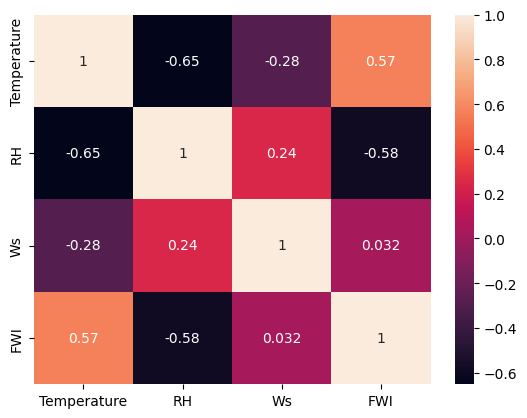

In [40]:
correlation_matrix = df[['Temperature','RH','Ws','FWI']].corr()
print(correlation_matrix)
sns.heatmap(df[['Temperature','RH','Ws','FWI']].corr(), annot=True)